In [1]:
using POMDPs
using POMDPModels: SimpleGridWorld
using POMDPModelTools: render,
                       policy_transition_matrix,
                       policy_reward_vector,
                       ordered_states
using POMDPPolicies: VectorPolicy
using LinearAlgebra: I

In [8]:
function policy_iteration(m)
    # setup
    A = collect(actions(m))
    γ = discount(m)
    n = length(states(m))
    p = VectorPolicy(m, rand(A, n))
    new_p = VectorPolicy(m, rand(A, n))
    pv_history = []

    while any(action(p, s) != action(new_p, s) for s in states(m))
        p = new_p

        # evaluate policy
        T = policy_transition_matrix(m, p)
        R = policy_reward_vector(m, p)
        V = (I - γ*T)\R

        push!(pv_history, (p=p, v=V))

        # extract new policy
        a_vec = Symbol[]
        for s in ordered_states(m)

            q = zeros(length(A))

            for (j, a) in enumerate(A)
                td = transition(m, s, a)
                for sp in support(td)
                    q[j] += pdf(td, sp) * (reward(m,s,a,sp) + γ*V[stateindex(m,sp)])
                end
            end

            push!(a_vec, A[argmax(q)])
        end
        new_p = VectorPolicy(m, a_vec)
    end

    return pv_history
end

policy_iteration (generic function with 1 method)

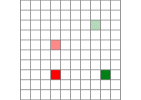

In [9]:
m = SimpleGridWorld()
render(m)

In [11]:
pv_history = policy_iteration(m);

In [12]:
using WebIO
using Interact

@manipulate for k in 1:length(pv_history)
    p,v = pv_history[k]
    render(m, color=v, policy=p)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["k"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 6, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
3, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/zach/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/zach/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/zach/.julia/packages/InteractBase/o1I6G/src/../assets/all.js"), Asset("css", nothing, "/home/zach/.julia/packages/InteractBase/o1I6G/src/../assets/style.css"), Asset("css", nothing, "/home/zach/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fa95c29f820, Task (runnable) @0x00007fa95c29f820), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"13943668384292753342\",\"id\":\"7415704243036545985\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"13943668384292753342\",\"id\":\"11461642289057170119\",\